In [10]:
# This script get summary statistics for fig1B
# Author: yur97 and bz

import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
# Read in data
dm_data = pickle.load(open('../out/20.0817 proc_data/gene_effect/dm_data.pkl','rb'))

In [12]:
# calculate statistics and plot summary stats
def plot_summ(dat, name):
    
    # get summary statistics
    medf=dat.median(axis=0)
    stdf = dat.std(axis=0)
    meadf = dat.mean(axis=0)
    cvdf = stdf/meadf
    medf.name = 'Median'
    stdf.name = 'Standard deviation'
    meadf.name = 'Mean'
    cvdf.name = 'Coefficient of variation'
    
    #plot
    sns.set_style("dark")
    sns.set(font_scale=1)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,5))
    fig.suptitle('%s Summary'%(name))
    
    sns.boxplot(y=medf,ax=axes[0],palette="cool")
    sns.boxplot(y=stdf, ax = axes[1],color="skyblue")
#     sns.swarmplot(y=stdf, ax = axes[0],color="grey", alpha = 0.15)
    sns.boxplot(y=cvdf,ax=axes[2],palette="coolwarm")
#     sns.swarmplot(y=cvdf,ax=axes[1],color="grey", alpha = 0.15)


    fig.tight_layout()

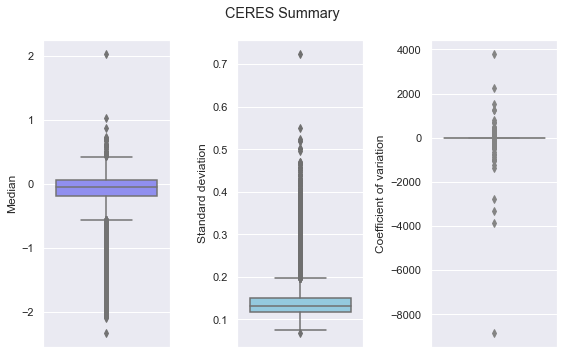

In [22]:
plot_summ(dm_data.df_crispr, 'CERES')

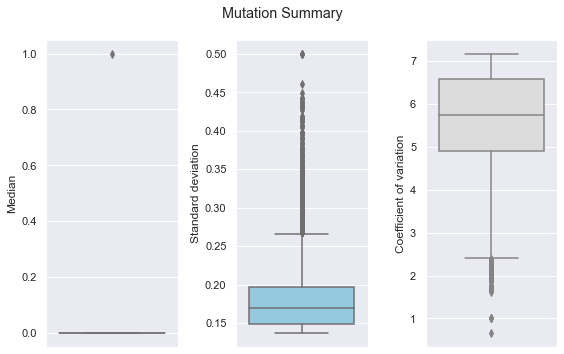

In [23]:
plot_summ(dm_data.df_mut, 'Mutation')

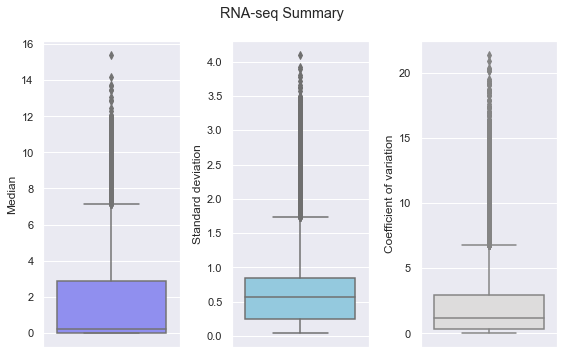

In [24]:
plot_summ(dm_data.df_rnaseq,'RNA-seq')

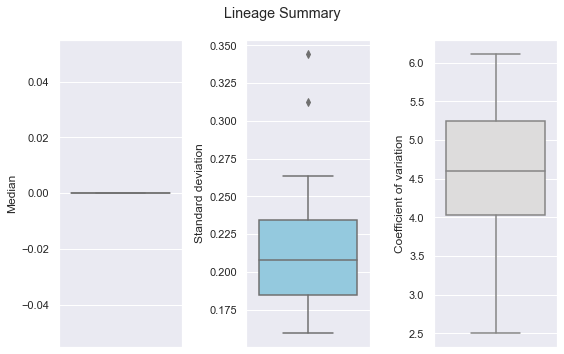

In [25]:
plot_summ(dm_data.df_lineage, 'Lineage')

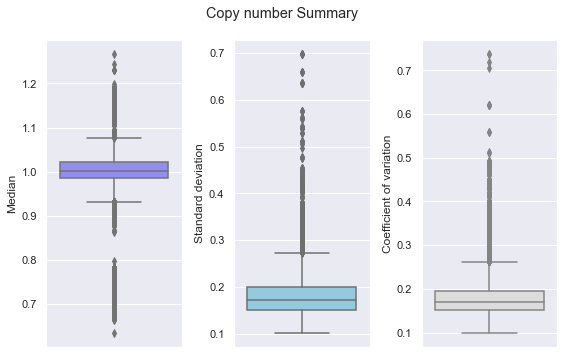

In [26]:
plot_summ(dm_data.df_cn, 'Copy number')

Aggregated

In [17]:
import pickle
from scipy.stats import variation
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [13]:
dm_data = pickle.load(open('../out/20.0817 proc_data/gene_effect/dm_data.pkl','rb'))

In [110]:
data = [dm_data.df_crispr,
        dm_data.df_rnaseq,
        dm_data.df_cn,
        dm_data.df_mut,
        dm_data.df_lineage]

In [180]:
def CV(df):
    # relative coefficient of variation
    return df.std(axis=0)/df.mean(axis=0)

def relCV(df):
    # relative coefficient of variation
    return df.std(axis=0)/np.abs(df.mean(axis=0))
    
def qcd(df):
    # relative quartile coefficient of dispersion
    return (df.quantile(q=0.75)-df.quantile(q=0.25))/np.abs(df.quantile(q=0.75)+df.quantile(q=0.25))
    
res1 = list(map(qcd, data[:3]))
res2 = list(map(CV, data[3:5]))


In [182]:
res = res1.copy()
res.append(res2[0])
res.append(res2[1])

In [183]:
df = pd.DataFrame(res).T
df.columns = ['CERES', 'RNA-seq', 'Copy number', 'Mutation', 'Lineage']
# df.plot.box(logy=True)

[Text(0, 0.5, 'Relative quartile coefficient\n of dispersion')]

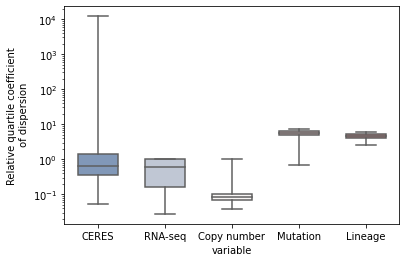

In [184]:
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), whis=[0, 100], width=.6, palette="vlag")
#ax = sns.stripplot(x="variable", y="value", data=pd.melt(df), s=1, alpha=0.05)
ax.set_yscale("log")
ax.set(ylabel='Relative quartile coefficient\n of dispersion')

[Text(0, 0.5, 'Relative quartile coefficient\n of dispersion')]

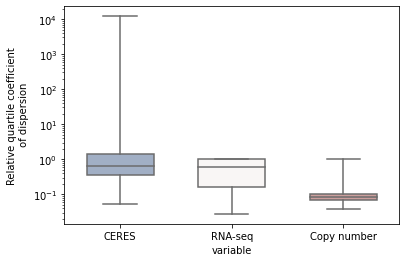

In [185]:
df = pd.DataFrame(res1).T
df.columns = ['CERES', 'RNA-seq', 'Copy number']

ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), whis=[0, 100], width=.6, palette="vlag")
ax.set_yscale("log")
ax.set(ylabel='Relative quartile coefficient\n of dispersion')

[Text(0, 0.5, 'Coefficient of variation')]

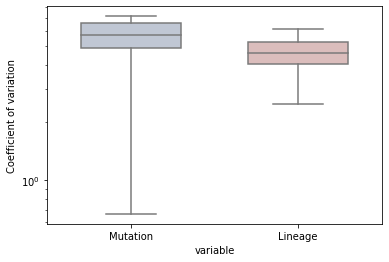

In [189]:
df = pd.DataFrame(res2).T
df.columns = ['Mutation', 'Lineage']

ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), whis=[0, 100], width=.6, palette="vlag")
ax.set_yscale("log")
ax.set(ylabel='Coefficient of variation')